<a href="https://colab.research.google.com/github/FaiazS/Auto-encoder-Model/blob/main/GenAIProject02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

from tensorflow.keras import layers, models

import numpy as np

import matplotlib.pyplot as plt

In [5]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

print(f"X_train_shape: {x_train.shape}")
print(f"X_test_shape : {x_test.shape}")

X_train_shape: (60000, 28, 28, 1)
X_test_shape : (10000, 28, 28, 1)


In [13]:
encoder = models.Sequential([layers.InputLayer(input_shape = (28, 28, 1)),

                             layers.Conv2D(32, (3,3), activation = 'relu', strides = 2, padding = 'same'),

                             layers.Conv2D(64, (3,3), activation = 'relu', strides = 2, padding = 'same'),

                             layers.Flatten(),

                             layers.Dense(64, activation = 'relu')])


decoder = models.Sequential([layers.InputLayer(input_shape = (64, )),

                             layers.Dense((7 * 7 * 64), activation = 'relu'),

                             layers.Reshape((7, 7, 64)),

                             layers.Conv2DTranspose(64, (3,3), activation = 'relu', strides = 2, padding = 'same'),

                             layers.Conv2DTranspose(32, (3,3), activation = 'relu', strides = 2, padding = 'same'),

                             layers.Conv2DTranspose(1, (3,3), activation = 'sigmoid', padding = 'same')])

autoencoder = models.Sequential([encoder, decoder])


autoencoder.compile(optimizer = 'adam', loss = "binary_crossentropy")


autoencoder.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)           │ (None, 64)                  │         219,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_11 (Sequential)           │ (None, 28, 28, 1)           │         259,521 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
encoder.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         200,768 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
decoder.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3136)                │         203,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_10                  │ (None, 14, 14, 64)          │          36,928 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_11                  │ (None, 28, 28, 32)          │          18,464 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_12                  │ (None, 28, 28, 1)           │             289 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.fit(x_train, x_train, epochs = 7, batch_size = 128, validation_data = (x_test, x_test))

Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 200ms/step - loss: 0.0852 - val_loss: 0.0772
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 192ms/step - loss: 0.0768 - val_loss: 0.0734
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - loss: 0.0735 - val_loss: 0.0717
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 194ms/step - loss: 0.0717 - val_loss: 0.0701
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 193ms/step - loss: 0.0706 - val_loss: 0.0694
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 196ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 196ms/step - loss: 0.0690 - val_loss: 0.0682


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


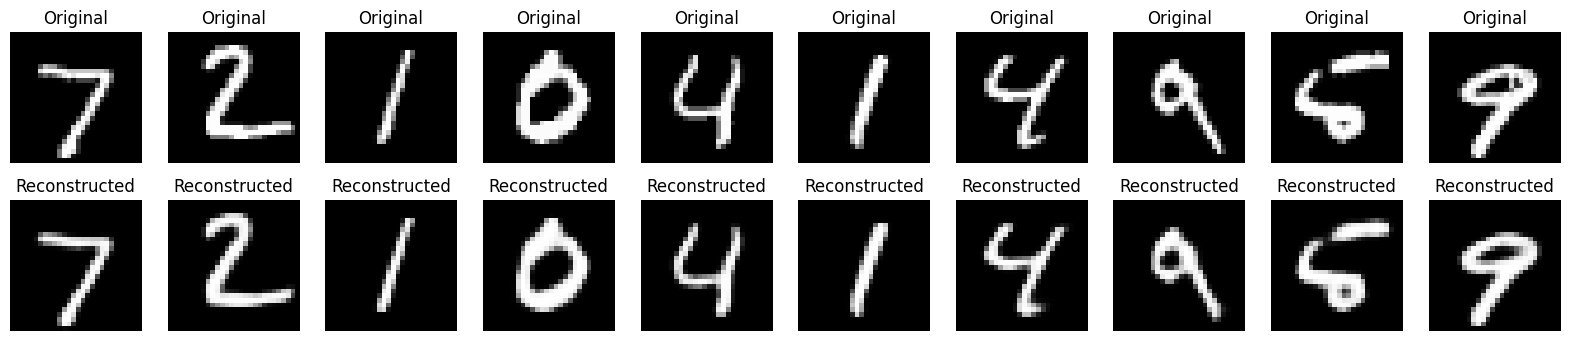

In [18]:
decoded_images = autoencoder.predict(x_test)

n = 10

plt.figure(figsize = (20, 4))

for i in range(n):

     axis = plt.subplot(2, n, i + 1)

     plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')

     plt.title('Original')

     plt.gray()

     axis.axis('off')


     axis = plt.subplot(2, n, i + 1 + n)

     plt.imshow(decoded_images[i].reshape(28, 28),cmap = 'gray')

     plt.title('Reconstructed')

     plt.gray()

     axis.axis('off')


plt.show()